In [1]:
# Upload Database
from google.colab import files
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends.csv


In [2]:
import pandas as pd

df = pd.read_csv('shopping_trends.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
unique_locations = df['Location'].unique()
print(unique_locations)

['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']


In [48]:
unique_purchase = df['Frequency of Purchases'].unique()
print(unique_purchase)

['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [78]:
unique_ship = df['Shipping Type'].unique()
print(unique_ship)

['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']


<ipython-input-15-ed97dcd8329b>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=item_frequency_df, x='Location', y='Frequency', hue='Item Purchased', ci=None)


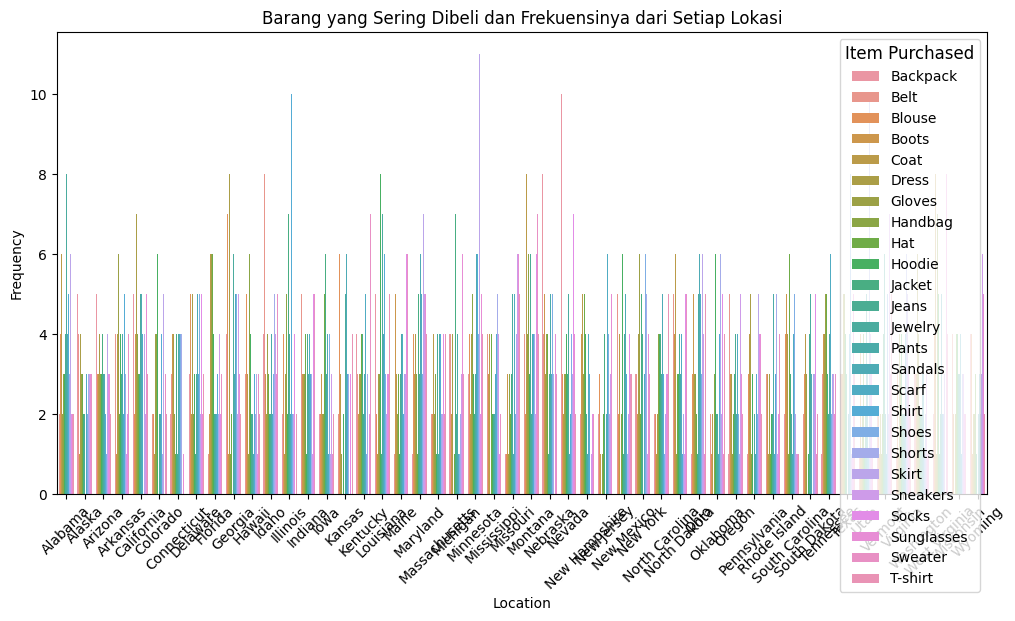

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
data = pd.read_csv('shopping_trends.csv')


# Group data berdasarkan 'Location' dan 'Item Purchased', kemudian hitung frekuensi
item_frequency = data.groupby(['Location', 'Item Purchased'])['Item Purchased'].count()

# Ubah hasil groupby menjadi DataFrame
item_frequency_df = item_frequency.reset_index(name='Frequency')

# Plot grafik batang dengan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=item_frequency_df, x='Location', y='Frequency', hue='Item Purchased', ci=None)
plt.title('Barang yang Sering Dibeli dan Frekuensinya dari Setiap Lokasi')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Item Purchased', title_fontsize='12')
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display

# Membaca data
data = pd.read_csv('shopping_trends.csv')

# Group data berdasarkan 'Location' dan 'Item Purchased', kemudian hitung frekuensi
item_frequency = data.groupby(['Location', 'Item Purchased'])['Item Purchased'].count()

# Ubah hasil groupby menjadi DataFrame
item_frequency_df = item_frequency.reset_index(name='Frequency')

# Ambil daftar lokasi unik
locations = item_frequency_df['Location'].unique()

# Fungsi untuk membuat dan menampilkan grafik berdasarkan lokasi yang dipilih
def show_chart(selected_location):
    data_location = item_frequency_df[item_frequency_df['Location'] == selected_location]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=data_location, x='Item Purchased', y='Frequency')
    plt.title(f'Barang yang Sering Dibeli di {selected_location}')
    plt.xlabel('Item Purchased')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Widget dropdown untuk memilih lokasi
location_dropdown = widgets.Dropdown(
    options=locations,
    description='Pilih Lokasi:'
)

# Interaksi untuk menampilkan grafik berdasarkan lokasi yang dipilih
interact(show_chart, selected_location=location_dropdown)


interactive(children=(Dropdown(description='Pilih Lokasi:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas…

<function __main__.show_chart(selected_location)>

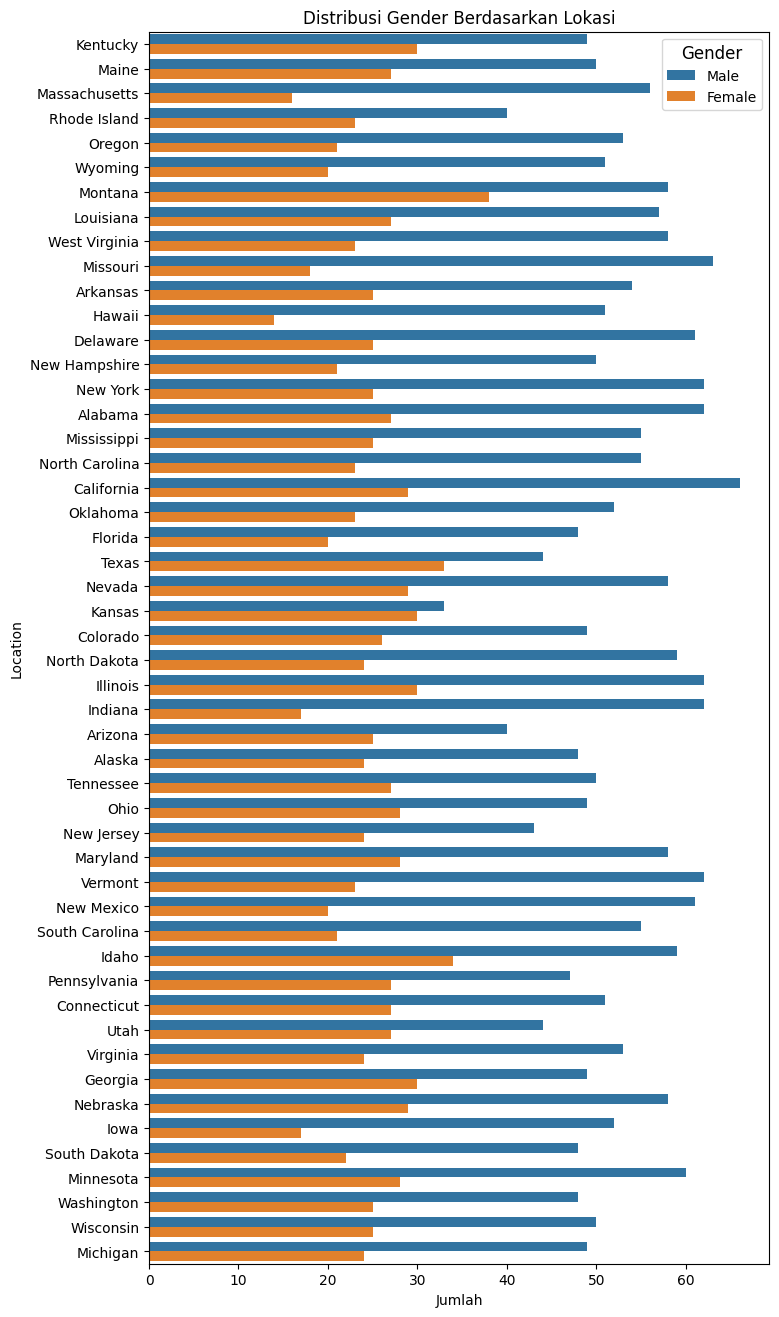

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
data = pd.read_csv('shopping_trends.csv')

# Membuat grafik dengan Seaborn
plt.figure(figsize=(8, 16))  # Mengatur ukuran gambar menjadi 16x8
sns.countplot(data=data, y='Location', hue='Gender')
plt.title('Distribusi Gender Berdasarkan Lokasi')
plt.ylabel('Location')
plt.xlabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Gender', title_fontsize='12')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


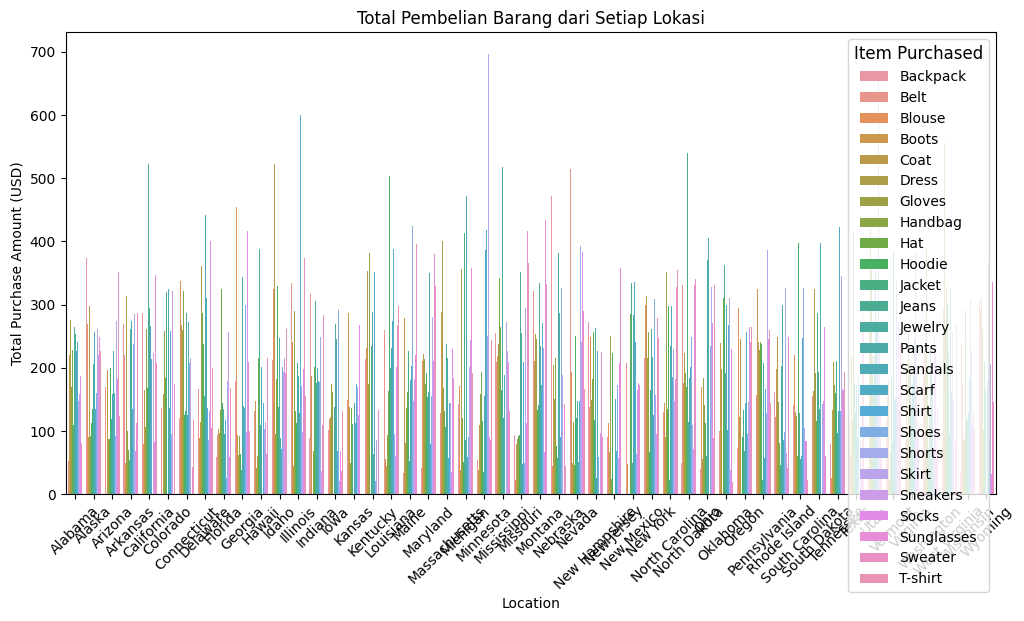

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
data = pd.read_csv('shopping_trends.csv')

# Group data berdasarkan 'Location' dan 'Item Purchased', kemudian jumlahkan 'Purchase Amount'
item_purchase_amount = data.groupby(['Location', 'Item Purchased'])['Purchase Amount (USD)'].sum()

# Ubah hasil groupby menjadi DataFrame
item_purchase_amount_df = item_purchase_amount.reset_index(name='Total Purchase Amount')

# Plot grafik batang dengan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=item_purchase_amount_df, x='Location', y='Total Purchase Amount', hue='Item Purchased')
plt.title('Total Pembelian Barang dari Setiap Lokasi')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Item Purchased', title_fontsize='12')
plt.show()


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display

# Membaca data
data = pd.read_csv('shopping_trends.csv')

# Group data berdasarkan 'Location' dan 'Item Purchased', kemudian jumlahkan 'Purchase Amount'
item_purchase_amount = data.groupby(['Location', 'Item Purchased'])['Purchase Amount (USD)'].sum()

# Ubah hasil groupby menjadi DataFrame
item_purchase_amount_df = item_purchase_amount.reset_index(name='Total Purchase Amount')

# Ambil daftar lokasi unik
locations = item_purchase_amount_df['Location'].unique()

# Fungsi untuk membuat dan menampilkan grafik berdasarkan lokasi yang dipilih
def show_chart(selected_location):
    data_location = item_purchase_amount_df[item_purchase_amount_df['Location'] == selected_location]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=data_location, x='Item Purchased', y='Total Purchase Amount')
    plt.title(f'Total Pembelian Barang di {selected_location}')
    plt.xlabel('Item Purchased')
    plt.ylabel('Total Purchase Amount (USD)')
    plt.xticks(rotation=45)
    plt.show()

# Widget dropdown untuk memilih lokasi
location_dropdown = widgets.Dropdown(
    options=locations,
    description='Pilih Lokasi:'
)

# Interaksi untuk menampilkan grafik berdasarkan lokasi yang dipilih
interact(show_chart, selected_location=location_dropdown)


interactive(children=(Dropdown(description='Pilih Lokasi:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas…

<function __main__.show_chart(selected_location)>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display

# Membaca data
data = pd.read_csv('shopping_trends.csv')

# Group data berdasarkan 'Season' dan 'Item Purchased', kemudian hitung frekuensi
item_frequency = data.groupby(['Season', 'Item Purchased'])['Item Purchased'].count()

# Ubah hasil groupby menjadi DataFrame
item_frequency_df = item_frequency.reset_index(name='Frequency')

# Ambil daftar musim (Season) unik
seasons = item_frequency_df['Season'].unique()

# Fungsi untuk membuat dan menampilkan grafik berdasarkan musim yang dipilih
def show_chart(selected_season):
    data_season = item_frequency_df[item_frequency_df['Season'] == selected_season]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=data_season, x='Item Purchased', y='Frequency')
    plt.title(f'Barang yang Sering Dibeli di Musim {selected_season}')
    plt.xlabel('Item Purchased')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Widget dropdown untuk memilih musim
season_dropdown = widgets.Dropdown(
    options=seasons,
    description='Pilih Musim:'
)

# Interaksi untuk menampilkan grafik berdasarkan musim yang dipilih
interact(show_chart, selected_season=season_dropdown)


interactive(children=(Dropdown(description='Pilih Musim:', options=('Fall', 'Spring', 'Summer', 'Winter'), val…

<function __main__.show_chart(selected_season)>

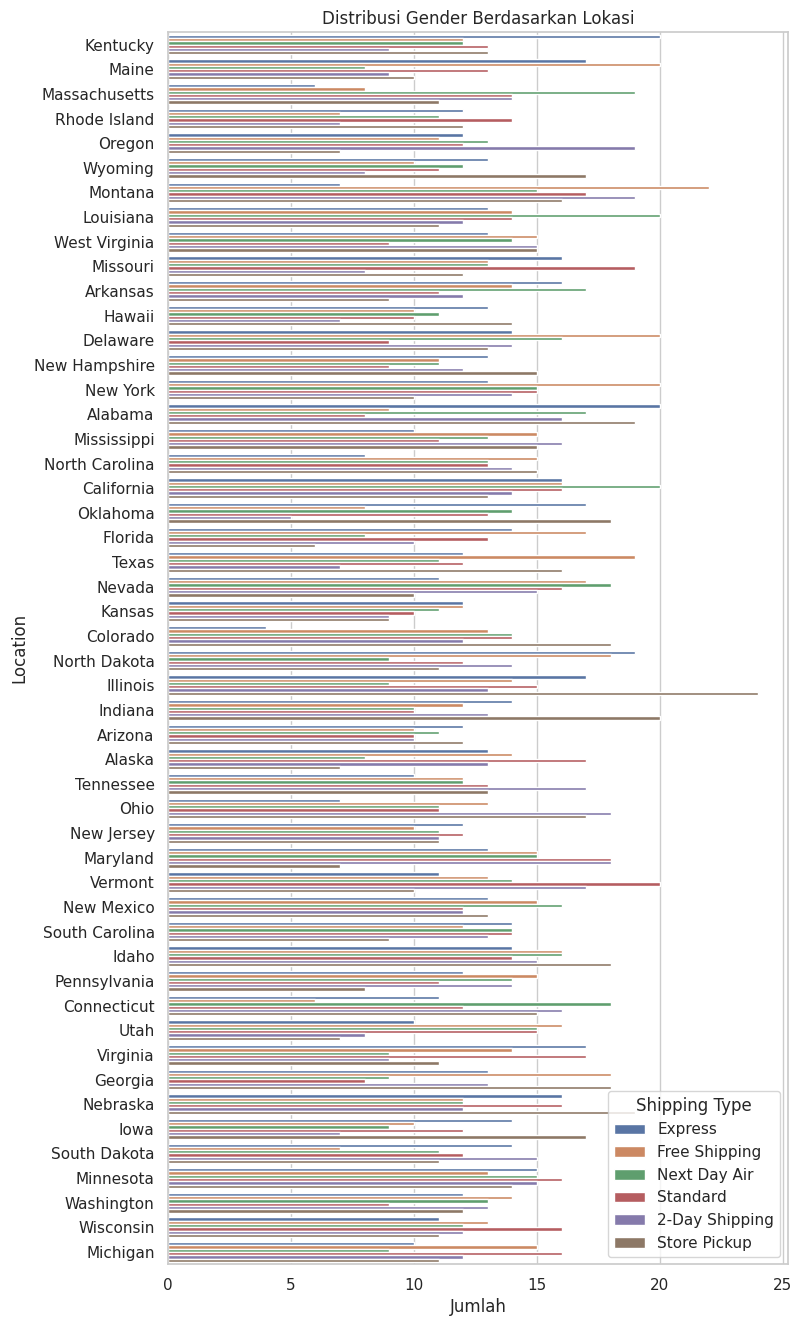

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
data = pd.read_csv('shopping_trends.csv')

# Membuat grafik dengan Seaborn
plt.figure(figsize=(8, 16))  # Mengatur ukuran gambar menjadi 16x8
sns.countplot(data=data, y='Location', hue='Shipping Type')
plt.title('Distribusi Gender Berdasarkan Lokasi')
plt.ylabel('Location')
plt.xlabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Shipping Type', title_fontsize='12')
plt.show()


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display

# Membaca data
data = pd.read_csv('shopping_trends.csv')

# Ambil daftar lokasi unik
locations = data['Location'].unique()

# Fungsi untuk membuat dan menampilkan grafik berdasarkan lokasi yang dipilih
def show_chart(selected_location):
    data_location = data[data['Location'] == selected_location]

    plt.figure(figsize=(8, 4))
    sns.countplot(data=data_location, x='Shipping Type')
    plt.title(f'Distribusi Metode Pengiriman di {selected_location}')
    plt.xlabel('Shipping Type')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

# Widget dropdown untuk memilih lokasi
location_dropdown = widgets.Dropdown(
    options=locations,
    description='Pilih Lokasi:'
)

# Interaksi untuk menampilkan grafik berdasarkan lokasi yang dipilih
interact(show_chart, selected_location=location_dropdown)


interactive(children=(Dropdown(description='Pilih Lokasi:', options=('Kentucky', 'Maine', 'Massachusetts', 'Rh…

<function __main__.show_chart(selected_location)>

In [85]:
#Segmentasi Pelanggan Menggunakan Algoritma Kmeans

In [155]:
# Membaca data
data = pd.read_csv('shopping_trends.csv')

# Daftar kategori frekuensi pembelian
frequency_mapping = {
    'Fortnightly': 26,  # Setiap dua minggu
    'Weekly': 52,       # Setiap minggu
    'Annually': 1,      # Setiap tahun
    'Quarterly': 4,     # Setiap tiga bulan
    'Bi-Weekly': 26,    # Setiap dua minggu
    'Monthly': 12,      # Setiap bulan
    'Every 3 Months': 4  # Setiap tiga bulan
}

# Mengubah kategori frekuensi pembelian menjadi angka
data['Frequency of Purchases'] = data['Frequency of Purchases'].map(frequency_mapping)

# Menggunakan data numerik ini dalam analisis K-Means
X = data[['Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']]
X

,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
0,53,14,26
1,64,2,26
2,73,23,52
3,90,49,52
4,49,31,1
...,...,...,...
3895,28,32,52
3896,49,41,26
3897,33,24,4
3898,77,24,52


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Purchase Amount (USD)'].plot(kind='hist', bins=20, title='Purchase Amount (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Previous Purchases'].plot(kind='hist', bins=20, title='Previous Purchases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Frequency of Purchases'].plot(kind='hist', bins=20, title='Frequency of Purchases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Purchase Amount (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Purchase Amount (USD)', y='Previous Purchases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Previous Purchases', y='Frequency of Purchases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Purchase Amount (USD)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Purchase Amount (USD)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Previous Purchases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Previous Purchases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Frequency of Purchases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Frequency of Purchases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Purchase Amount (USD)'].plot(kind='line', figsize=(8, 4), title='Purchase Amount (USD)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Previous Purchases'].plot(kind='line', figsize=(8, 4), title='Previous Purchases')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Frequency of Purchases'].plot(kind='line', figsize=(8, 4), title='Frequency of Purchases')
plt.gca().spines[['top', 'right']].set_visible(False)

In [156]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# X_normalized sekarang berisi data yang telah dinormalisasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

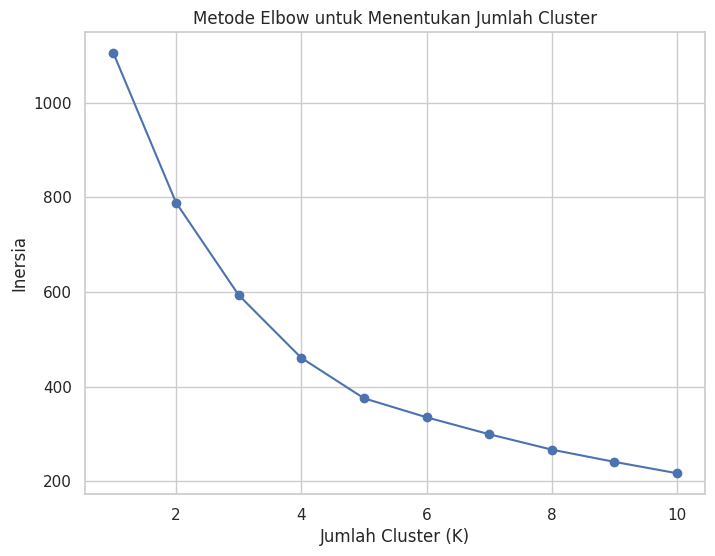

In [157]:
from sklearn.cluster import KMeans
# Menyimpan inersia untuk berbagai nilai K
scores = []
for k in range(1, 11):  # Coba nilai K dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_normalized)
    score = kmeans.score(X_normalized)  # Skor keseluruhan
    scores.append(-score)  # Inersia adalah negatif dari skor

# Plot grafik inersia
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.show()

In [161]:
# Menggunakan K-Means untuk mengelompokkan data menjadi 3 cluster
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(X_normalized)

# Menambahkan kolom Cluster ke dalam data
data['Cluster'] = kmeans.labels_

# Memilih kolom yang akan ditampilkan dalam tabel
result = data[['Customer ID', 'Purchase Amount (USD)', 'Frequency of Purchases', 'Previous Purchases', 'Cluster']]

# Menampilkan hasil clustering dalam bentuk tabel
result

,Customer ID,Purchase Amount (USD),Frequency of Purchases,Previous Purchases,Cluster
0,1,53,26,14,1
1,2,64,26,2,2
2,3,73,52,23,0
3,4,90,52,49,0
4,5,49,1,31,1
...,...,...,...,...,...
3895,3896,28,52,32,0
3896,3897,49,26,41,1
3897,3898,33,4,24,1
3898,3899,77,52,24,0


from matplotlib import pyplot as plt
_df_15['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Customer ID'].plot(kind='hist', bins=20, title='Customer ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Purchase Amount (USD)'].plot(kind='hist', bins=20, title='Purchase Amount (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Frequency of Purchases'].plot(kind='hist', bins=20, title='Frequency of Purchases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='index', y='Customer ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Customer ID', y='Purchase Amount (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Purchase Amount (USD)', y='Frequency of Purchases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Frequency of Purchases', y='Previous Purchases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Purchase Amount (USD)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Purchase Amount (USD)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Frequency of Purchases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Frequency of Purchases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Previous Purchases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Previous Purchases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Cluster']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Cluster')

from matplotlib import pyplot as plt
_df_27['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Customer ID'].plot(kind='line', figsize=(8, 4), title='Customer ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Purchase Amount (USD)'].plot(kind='line', figsize=(8, 4), title='Purchase Amount (USD)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Frequency of Purchases'].plot(kind='line', figsize=(8, 4), title='Frequency of Purchases')
plt.gca().spines[['top', 'right']].set_visible(False)

In [159]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_normalized, result['Cluster'])
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.3018031570332252
